In [1]:
using OptimalControl
using Plots

┌ Info: Precompiling OptimalControl [5f98b655-cc9a-415a-b60e-744165666948]
└ @ Base loading.jl:1664


In [2]:
# description of the optimal control problem
t0 = 0.0                # t0 is fixed
tf = 1.0                # tf is fixed
x0 = [-1.0; 0.0]        # the initial condition is fixed
xf = [0.0; 0.0]         # the target is fixed
A = [0.0 1.0
    0.0 0.0]
B = [0.0; 1.0]
f(x, u) = A * x + B * u[1];  # dynamics
L(x, u) = 0.5 * u[1]^2   # integrand of the Lagrange cost

# problem definition
ocp = OptimalControlProblem(L, f, t0, x0, tf, xf, 2, 1, :autonomous)

# display the formulation of the problem
display(ocp)

# solution of the optimal control problem
N  = 1001
U⁺ = range(6.0, stop=-6.0, length=N) # solution
U⁺ = U⁺[1:end-1];

Optimal control problem of the form:

    minimize  J(x, u) = ∫ L(x(t), u(t)) dt, over [t0, tf]

    subject to

        ẋ(t) = f(x(t), u(t)), t in [t0, tf] a.e.,

        x(t0) = x0, x(tf) = xf,

    where x(t) ∈ R^2 and u(t) ∈ R. Besides, t0, tf, x0 and xf are fixed. 


In [3]:
# initial iterate
U_init = U⁺-1e0*ones(N-1); U_init = [ [U_init[i]] for i=1:N-1 ]

# resolution
sol = solve(ocp, :direct, :simple_shooting, init=U_init);


Method = (:direct, :simple_shooting, :descent, :bfgs, :bissection)

Method = (:descent, :bfgs, :bissection)

     Calls  ‖∇F(U)‖         ‖U‖             Stagnation      

         0  8.63964910e+02  5.08735688e+01  0.00000000e+00
         1  8.49119140e+02  5.36988289e+01  8.37872787e-03
         2  1.23530491e+01  4.51911448e+01  2.70120099e-01
         3  9.43699752e+00  5.12380463e+01  2.29292188e-02
         4  7.13131394e-03  4.89164081e+01  1.18402637e-05
         5  1.11507982e-05  4.89169596e+01  1.75781438e-08
         6  1.11507799e-05  4.89169596e+01  3.39141735e-14

Descent solver result:
   iterations: 6
   stopping: the step length became too small
   success: true


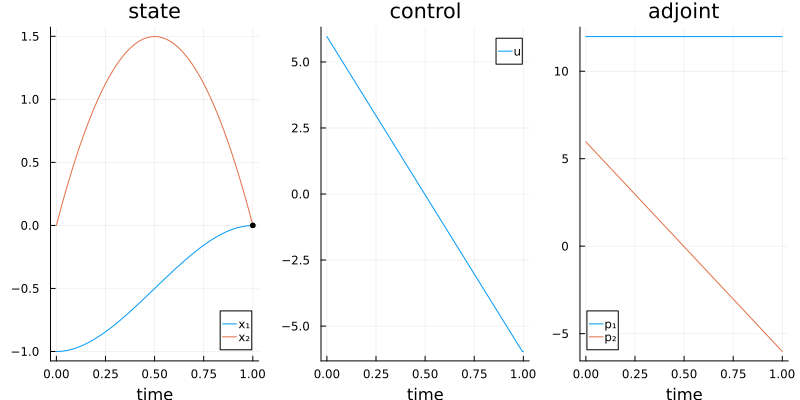

In [4]:
# plot solution
ps = plot(sol, size=(800, 400))

# plot target
point_style = (color=:black, seriestype=:scatter, markersize=3, markerstrokewidth=0, label="")
plot!(ps[1], [tf], [xf[1]]; point_style...)
plot!(ps[1], [tf], [xf[2]]; point_style...)